# Importing different libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Retrieve the dataset

In [2]:
df=pd.read_csv('data_sales (1).csv')

# Data Sampling

In [3]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet


In [4]:
df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store
9640,Sports Direct,1185732,10/5/2021,Northeast,Connecticut,Hartford,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


# Check/Handle Null Values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


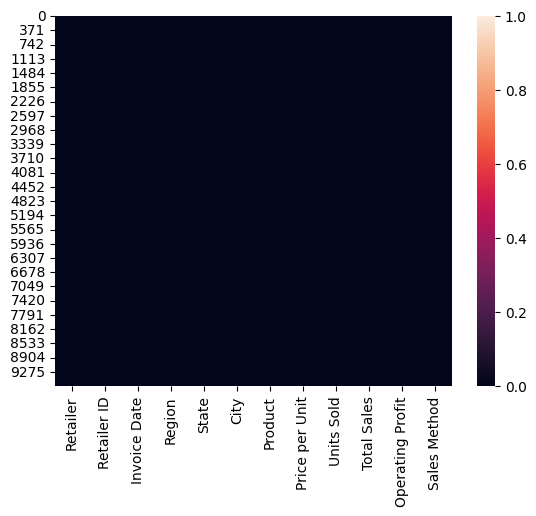

In [6]:
sns.heatmap(df.isna())
plt.show()

In [7]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [8]:
df['Price per Unit']=df['Price per Unit'].fillna('$10.00')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9641 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


# Check/Handle Duplicates

In [10]:
print('Are there any duplicates ?',df.duplicated().any())

Are there any duplicates ? False


# Data Preprocessing

####  **Create proper date format**

In [11]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date'])

####  **Convert numerical columns to float data format**

In [12]:
df['Price per Unit']=df['Price per Unit'].str.replace('$','').astype('float')

####  **Convert numerical columns to float data format**

In [13]:
df['Operating Profit']=df['Operating Profit'].str.replace('$','').str.replace(',','').astype('float')

In [14]:
df['Units Sold']=df['Units Sold'].str.replace(',','').astype('int32')

####  **Create new Sales column**

In [15]:
df['sales']=df['Price per Unit']*df['Units Sold']

####  **Create Cost of sales column**

In [16]:
df['cost_of_sales']=df['sales']-df['Operating Profit']

####  **Drop unused columns**

In [17]:
df.drop(axis=1,columns='Total Sales',inplace=True)

####  **Rename Columns**

In [18]:
df.columns=['retailer', 'retailer_ID', 'invoice_date', 'region', 'state', 'city',
       'product', 'price_per_unit', 'units_sold', 'operating_profit',
       'sales_method', 'sales', 'cost_of_sales']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9641 non-null   object        
 1   retailer_ID       9641 non-null   int64         
 2   invoice_date      9641 non-null   datetime64[ns]
 3   region            9641 non-null   object        
 4   state             9641 non-null   object        
 5   city              9641 non-null   object        
 6   product           9641 non-null   object        
 7   price_per_unit    9641 non-null   float64       
 8   units_sold        9641 non-null   int32         
 9   operating_profit  9641 non-null   float64       
 10  sales_method      9641 non-null   object        
 11  sales             9641 non-null   float64       
 12  cost_of_sales     9641 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(6)
memory usage: 

In [20]:
df.columns

Index(['retailer', 'retailer_ID', 'invoice_date', 'region', 'state', 'city',
       'product', 'price_per_unit', 'units_sold', 'operating_profit',
       'sales_method', 'sales', 'cost_of_sales'],
      dtype='object')

In [21]:
from pathlib import Path  # doctest: +SKIP
filepath = Path(r'C:\Users\User\Downloads\SQL\PROJECTS\apparel.csv')  # doctest: +SKIP
filepath.parent.mkdir(parents=True, exist_ok=True)  # doctest: +SKIP
df.to_csv(filepath,columns= ['retailer', 'retailer_ID', 'invoice_date', 'region', 'state', 'city',
       'product', 'price_per_unit', 'units_sold', 'operating_profit',
       'sales_method', 'sales', 'cost_of_sales'],header= True,
        index = True,)  # doctest: +SKIP

####  **Create year column**

In [22]:
df['year']=df['invoice_date'].dt.year

####  **Create month column**

In [23]:
df['month']=df['invoice_date'].dt.month

# Check/Handle Categorical or Ordinal data

In [24]:
df['retailer'].nunique()

6

In [25]:
df['retailer_ID'].unique()

array([1128299, 1197831, 1185732, 1189833])

In [26]:
df['retailer_ID'].nunique()

4

In [27]:
df['region'].unique()

array(['Southeast', 'South', 'Midwest', 'Northeast', 'West'], dtype=object)

In [28]:
df['region'].nunique()

5

In [29]:
df['state'].unique()

array(['Florida', 'Louisiana', 'Alabama', 'Missouri', 'Mississippi',
       'Wisconsin', 'New York', 'Michigan', 'Utah', 'Ohio', 'Arkansas',
       'Georgia', 'Texas', 'Oklahoma', 'West Virginia', 'California',
       'South Carolina', 'Kansas', 'Tennessee', 'North Carolina', 'Idaho',
       'Indiana', 'New Jersey', 'Oregon', 'South Dakota', 'North Dakota',
       'Iowa', 'Maryland', 'Delaware', 'Washington', 'Virginia',
       'Wyoming', 'Minnesota', 'Kentucky', 'Connecticut', 'Rhode Island',
       'Massachusetts', 'New Mexico', 'Nevada', 'Illinois', 'Nebraska',
       'Maine', 'Arizona', 'Vermont', 'New Hampshire', 'Hawaii',
       'Montana', 'Colorado', 'Pennsylvania', 'Alaska'], dtype=object)

In [30]:
df['state'].nunique()

50

In [31]:
df['city'].unique()

array(['Orlando', 'New Orleans', 'Birmingham', 'St. Louis', 'Jackson',
       'Milwaukee', 'New York', 'Detroit', 'Salt Lake City', 'Columbus',
       'Little Rock', 'Atlanta', 'Houston', 'Oklahoma City', 'Charleston',
       'San Francisco', 'Dallas', 'Wichita', 'Miami', 'Knoxville',
       'Los Angeles', 'Charlotte', 'Boise', 'Indianapolis', 'Newark',
       'Portland', 'Sioux Falls', 'Fargo', 'Des Moines', 'Baltimore',
       'Wilmington', 'Seattle', 'Richmond', 'Albany', 'Cheyenne',
       'Minneapolis', 'Louisville', 'Hartford', 'Providence', 'Boston',
       'Albuquerque', 'Las Vegas', 'Chicago', 'Omaha', 'Phoenix',
       'Burlington', 'Manchester', 'Honolulu', 'Billings', 'Denver',
       'Philadelphia', 'Anchorage'], dtype=object)

In [32]:
df['city'].nunique()

52

In [33]:
df.groupby('state')['city'].nunique().sort_values(ascending=False)

state
Florida           2
California        2
Texas             2
New York          2
Alaska            1
Alabama           1
Colorado          1
Connecticut       1
Arkansas          1
Arizona           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Delaware          1
Georgia           1
Louisiana         1
Kentucky          1
Massachusetts     1
Maine             1
Minnesota         1
Mississippi       1
Missouri          1
Maryland          1
Montana           1
Nebraska          1
New Hampshire     1
Nevada            1
New Jersey        1
New Mexico        1
North Carolina    1
Michigan          1
North Dakota      1
Ohio              1
Oregon            1
Oklahoma          1
Rhode Island      1
South Carolina    1
South Dakota      1
Pennsylvania      1
Tennessee         1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
Wyoming       

In [34]:
df.groupby('region')['city'].nunique()

region
Midwest      13
Northeast    13
South         8
Southeast     7
West         13
Name: city, dtype: int64

In [35]:
df.groupby(['state','region'])['city'].nunique().sort_values(ascending=False)

state           region   
Florida         Southeast    2
California      West         2
Texas           South        2
New York        Northeast    2
Alaska          West         1
Alabama         South        1
Colorado        West         1
Connecticut     Northeast    1
Arkansas        South        1
Arizona         West         1
Hawaii          West         1
Idaho           West         1
Illinois        Midwest      1
Indiana         Midwest      1
Iowa            Midwest      1
Kansas          Midwest      1
Delaware        Northeast    1
Georgia         Southeast    1
Louisiana       South        1
Kentucky        Southeast    1
Massachusetts   Northeast    1
Maine           Northeast    1
Minnesota       Midwest      1
Mississippi     South        1
Missouri        Midwest      1
Maryland        Northeast    1
Montana         Midwest      1
Nebraska        Midwest      1
New Hampshire   Northeast    1
Nevada          West         1
New Jersey      Northeast    1
New Mexico   

In [36]:
df['sales_method'].unique()

array(['Online', 'Outlet', 'In-store'], dtype=object)

# Data Exploration

### 1. Analysis of Sales,Cost and Gross Margin

In [37]:
print('Total Sales =',df['sales'].sum())

Total Sales = 119938775.0


In [38]:
print('Total Cogs =',df['cost_of_sales'].sum())

Total Cogs = 86780691.0


In [39]:
print('Gross Profit =',df['sales'].sum()-df['cost_of_sales'].sum())

Gross Profit = 33158084.0


In [40]:
print('Gross Profit% =',round((df['sales'].sum()-df['cost_of_sales'].sum())/df['sales'].sum(),2))

Gross Profit% = 0.28


###### **Yoy change Sales**

In [41]:
df.groupby('year')['sales'].sum()

year
2020    24065200.0
2021    95873575.0
Name: sales, dtype: float64

In [42]:
df.groupby('year')['sales'].sum().shift(1)

year
2020           NaN
2021    24065200.0
Name: sales, dtype: float64

In [43]:
round((df.groupby('year')['sales'].sum()-df.groupby('year')['sales'].sum().shift(1))/df.groupby('year')['sales'].sum().shift(1),2)

year
2020     NaN
2021    2.98
Name: sales, dtype: float64

###### **Mom% change Sales**

In [44]:
df.groupby(['year','month'])['sales'].sum()

year  month
2020  1         2270246.0
      2         2140813.0
      3         2474202.0
      4         3193081.0
      5         2164764.0
      6         1084194.0
      7         2143763.0
      8         2606630.0
      9         2367686.0
      10        1428569.0
      11        1168050.0
      12        1023202.0
2021  1         7396271.0
      2         6123040.0
      3         5220782.0
      4         6498339.0
      5         8576956.0
      6         8698953.0
      7        10368031.0
      8         9651596.0
      9         8037898.0
      10        7110189.0
      11        7855390.0
      12       10336130.0
Name: sales, dtype: float64

In [45]:
df.groupby(['year','month'])['sales'].sum().shift(1)

year  month
2020  1               NaN
      2         2270246.0
      3         2140813.0
      4         2474202.0
      5         3193081.0
      6         2164764.0
      7         1084194.0
      8         2143763.0
      9         2606630.0
      10        2367686.0
      11        1428569.0
      12        1168050.0
2021  1         1023202.0
      2         7396271.0
      3         6123040.0
      4         5220782.0
      5         6498339.0
      6         8576956.0
      7         8698953.0
      8        10368031.0
      9         9651596.0
      10        8037898.0
      11        7110189.0
      12        7855390.0
Name: sales, dtype: float64

In [46]:
(df.groupby(['year','month'])['sales'].sum()-df.groupby(['year','month'])['sales'].sum().shift(1))/df.groupby(['year','month'])['sales'].sum().shift(1)

year  month
2020  1             NaN
      2       -0.057013
      3        0.155730
      4        0.290550
      5       -0.322045
      6       -0.499163
      7        0.977287
      8        0.215913
      9       -0.091668
      10      -0.396639
      11      -0.182364
      12      -0.124008
2021  1        6.228554
      2       -0.172145
      3       -0.147355
      4        0.244706
      5        0.319869
      6        0.014224
      7        0.191871
      8       -0.069100
      9       -0.167195
      10      -0.115417
      11       0.104807
      12       0.315801
Name: sales, dtype: float64

# 2. Sales by categorical data

###### **Sales value by product**

In [47]:
df.groupby('product')['sales'].sum().sort_values(ascending=False)

product
Men's Street Footwear        27680769.0
Women's Apparel              23814985.0
Men's Athletic Footwear      20532180.0
Women's Street Footwear      17171938.0
Men's Apparel                16373382.0
Women's Athletic Footwear    14311521.0
Men's aparel                    54000.0
Name: sales, dtype: float64

###### ***The highest selling product is mens street footwear.***

###### **Sales value by Retailer**

In [48]:
df.groupby('retailer')['sales'].sum().sort_values(ascending=False)

retailer
West Gear        32317808.0
Foot Locker      28962445.0
Sports Direct    24542997.0
Kohl's           13512453.0
Walmart          10506085.0
Amazon           10096987.0
Name: sales, dtype: float64

###### ***West Gear is the highest selling retailer of our products.***

###### **Sales value by Region**

In [49]:
df.groupby('region')['sales'].sum().sort_values(ascending=False)

region
West         36344407.0
Northeast    25035767.0
Southeast    21374436.0
South        20529731.0
Midwest      16654434.0
Name: sales, dtype: float64

###### ***The West coast is the highest selling region.***

###### **Sales value by State**

In [50]:
df.groupby('state')['sales'].sum().sort_values(ascending=False)

state
New York          8627964.0
California        8488758.0
Florida           7820589.0
Texas             6538746.0
South Carolina    3593112.0
Louisiana         3377031.0
Washington        3222093.0
Virginia          3074415.0
Oregon            3047049.0
Nevada            2981134.0
North Carolina    2936581.0
New Mexico        2824641.0
Idaho             2742753.0
Hawaii            2734457.0
Georgia           2708591.0
Colorado          2569036.0
Tennessee         2567190.0
Alabama           2513424.0
New Hampshire     2339267.0
Michigan          2287283.0
Wyoming           2282342.0
Ohio              2269283.0
Arizona           2254096.0
Mississippi       2218609.0
Vermont           2041598.0
Montana           1930761.0
Alaska            1810428.0
Arkansas          1802672.0
Connecticut       1646448.0
Massachusetts     1578435.0
Oklahoma          1512059.0
Delaware          1508537.0
Pennsylvania      1478794.0
Utah              1387620.0
West Virginia     1311160.0
Kentucky      

###### ***New York state is the highest selling state.***

###### **Sales value by City**

In [51]:
df.groupby('city')['sales'].sum().sort_values(ascending=False)

city
New York          5633660.0
Charleston        4904272.0
San Francisco     4837470.0
Portland          4176777.0
Orlando           3946476.0
Miami             3874113.0
Los Angeles       3651288.0
Houston           3556007.0
New Orleans       3377031.0
Seattle           3222093.0
Richmond          3074415.0
Albany            2994304.0
Dallas            2982739.0
Las Vegas         2981134.0
Charlotte         2936581.0
Albuquerque       2824641.0
Boise             2742753.0
Honolulu          2734457.0
Atlanta           2708591.0
Denver            2569036.0
Knoxville         2567190.0
Birmingham        2513424.0
Manchester        2339267.0
Detroit           2287283.0
Cheyenne          2282342.0
Columbus          2269283.0
Phoenix           2254096.0
Jackson           2218609.0
Burlington        2041598.0
Billings          1930761.0
Anchorage         1810428.0
Little Rock       1802672.0
Hartford          1646448.0
Boston            1578435.0
Oklahoma City     1512059.0
Wilmington     

###### ***New York city is the highest selling state. This is consistent with sales by state.***

###### **Sales value by State,region and city.**

In [52]:
df.groupby(['state','region','city'])['sales'].sum().sort_values(ascending=False)

state           region     city          
New York        Northeast  New York          5633660.0
California      West       San Francisco     4837470.0
Florida         Southeast  Orlando           3946476.0
                           Miami             3874113.0
California      West       Los Angeles       3651288.0
South Carolina  Southeast  Charleston        3593112.0
Texas           South      Houston           3556007.0
Louisiana       South      New Orleans       3377031.0
Washington      West       Seattle           3222093.0
Virginia        Southeast  Richmond          3074415.0
Oregon          West       Portland          3047049.0
New York        Northeast  Albany            2994304.0
Texas           South      Dallas            2982739.0
Nevada          West       Las Vegas         2981134.0
North Carolina  Southeast  Charlotte         2936581.0
New Mexico      West       Albuquerque       2824641.0
Idaho           West       Boise             2742753.0
Hawaii          West   

###### ***The hisghest selling states are New York,California and Florida with New York,San Francisco,Orlando and Miami being the protagonists in each state.***

###### **Sales value by Sales Channel.**

In [53]:
df.groupby('sales_method')['sales'].sum().sort_values(ascending=False)

sales_method
Online      44965657.0
Outlet      39308743.0
In-store    35664375.0
Name: sales, dtype: float64

###### ***The highest selling sales channel is online.***

###### **Sales value by Sales Channel and product and retailer in each state and city.**

In [54]:
df.groupby(['sales_method','product','retailer','state','city'])['sales'].sum().nlargest(10)

sales_method  product                  retailer       state           city         
Outlet        Women's Apparel          West Gear      California      San Francisco    730141.0
Online        Men's Street Footwear    Foot Locker    South Carolina  Charleston       709340.0
Outlet        Men's Athletic Footwear  West Gear      California      San Francisco    696712.0
              Men's Street Footwear    West Gear      California      San Francisco    693179.0
              Women's Street Footwear  West Gear      California      San Francisco    615014.0
              Women's Apparel          Kohl's         California      Los Angeles      601725.0
Online        Men's Street Footwear    Sports Direct  North Carolina  Charlotte        595282.0
              Women's Apparel          Foot Locker    South Carolina  Charleston       594979.0
Outlet        Men's Apparel            West Gear      California      San Francisco    562982.0
Online        Men's Street Footwear    Amazon       

###### ***The metric differs from product and sales channel metrics. This metric displays that women's apparel is the leading product in outlets,yet the highest selling product is mens footwear and the leading sales channel is online. We can deduce that women in San Francisco are leading customers for womens apparel in major outlets.***

###### **Sales value by Retailer in each state,region and city.**

In [55]:
df.groupby(['retailer','state','region','city'])['sales'].sum().nlargest(10)

retailer       state           region     city         
West Gear      California      West       San Francisco    4668897.0
Kohl's         California      West       Los Angeles      3578910.0
Foot Locker    New York        Northeast  New York         3511643.0
               South Carolina  Southeast  Charleston       3048130.0
West Gear      Oregon          West       Portland         3047049.0
               Washington      West       Seattle          3043300.0
Walmart        Florida         Southeast  Orlando          2992039.0
West Gear      Nevada          West       Las Vegas        2981134.0
Sports Direct  Texas           South      Dallas           2923048.0
West Gear      Louisiana       South      New Orleans      2903868.0
Name: sales, dtype: float64

###### ***This metric is very similar to the one above,West Gear is the leading retailer in the state of california and the city of San Francisco.***

In [56]:
df.groupby(['retailer'])['city'].nunique().nlargest(10)

retailer
Foot Locker      32
Sports Direct    26
West Gear        23
Kohl's           12
Amazon            9
Walmart           6
Name: city, dtype: int64

###### **Footlocker has a footprint in 32 cities. Whilst Sports Direct(26) and the leading retailer West Gear(23). It would seem that even though footlocker has more footprint our products are best sold at West Gear outlets.**

In [57]:
df.groupby(['retailer'])['state'].nunique().nlargest(10)

retailer
Foot Locker      33
Sports Direct    24
West Gear        23
Kohl's           11
Amazon            9
Walmart           6
Name: state, dtype: int64

###### **Footlocker has a footprint in 33 states. West Gear outlets are in ten less states than Footlocker but is the leading seller.**

In [58]:
df.groupby('retailer')['sales_method'].value_counts()

retailer       sales_method
Amazon         Online           540
               Outlet           291
               In-store         118
Foot Locker    Online          1395
               Outlet           790
               In-store         449
Kohl's         Online           576
               Outlet           310
               In-store         144
Sports Direct  Online           995
               Outlet           742
               In-store         293
Walmart        Outlet           301
               Online           288
               In-store          37
West Gear      Online          1095
               In-store         699
               Outlet           578
Name: count, dtype: int64

###### **This metric displays that in all retailers online is the leading sales channel. In some cases by even more than 50%,which would suggest that sales and marketing should focus their attention on this channel to maximise sales opportunities.**

###### **Sales by retailer and product in each state and city**

In [59]:
df.groupby(['retailer','product','state','city'])['sales'].sum().nlargest(10)

retailer     product                    state           city         
West Gear    Women's Apparel            California      San Francisco    889717.0
             Men's Athletic Footwear    California      San Francisco    848762.0
             Men's Street Footwear      California      San Francisco    840252.0
Foot Locker  Men's Street Footwear      New York        New York         798289.0
West Gear    Women's Street Footwear    California      San Francisco    746279.0
Kohl's       Women's Apparel            California      Los Angeles      726767.0
Foot Locker  Men's Street Footwear      South Carolina  Charleston       709340.0
West Gear    Men's Apparel              California      San Francisco    687951.0
             Women's Athletic Footwear  California      San Francisco    655936.0
Kohl's       Men's Athletic Footwear    California      Los Angeles      645473.0
Name: sales, dtype: float64

###### **This metric differs from the overall product and state/city metrics,in that, the overall metrics reflect New York state and New York city as leading state/city,as well as mens footwear being the leading product. On the other hand it is the same as the sales channel and retailer metrics in that West Gear is the leading retailer and the leading sales channel(outlet) is West Gear and womens apparel which is sold at West Gear outlet particularly the San Francisco outlet.**

### 3. Analysis of Quantities Sold

###### **Total Quantities Sold**

In [60]:
print('Total quantity sold =',df['units_sold'].sum())

Total quantity sold = 2475611


###### **Quantities sold by year**


In [61]:
df.groupby('year')['units_sold'].sum()

year
2020     460099
2021    2015512
Name: units_sold, dtype: int32

###### **YOY change**

In [62]:
df.groupby('year')['units_sold'].sum()

year
2020     460099
2021    2015512
Name: units_sold, dtype: int32

In [63]:
df.groupby('year')['units_sold'].sum().shift(1)

year
2020         NaN
2021    460099.0
Name: units_sold, dtype: float64

In [64]:
(df.groupby('year')['units_sold'].sum()-df.groupby('year')['units_sold'].sum().shift(1))/df.groupby('year')['units_sold'].sum().shift(1)

year
2020         NaN
2021    3.380605
Name: units_sold, dtype: float64

###### **Quantities sold by product**

In [65]:
df.groupby('product')['units_sold'].sum().sort_values(ascending=False)

product
Men's Street Footwear        593320
Men's Athletic Footwear      434451
Women's Apparel              433127
Women's Street Footwear      391444
Women's Athletic Footwear    317136
Men's Apparel                305233
Men's aparel                    900
Name: units_sold, dtype: int32

###### **This metric is the same as the sales value metric. It reflects that Mens Street Footwear is the leading product.**

###### **Quantities sold by region**

In [66]:
df.groupby('region')['units_sold'].sum().sort_values(ascending=False)

region
West         685735
Northeast    501279
South        490710
Southeast    407000
Midwest      390887
Name: units_sold, dtype: int32

###### **This metric is different from the sales value metric. In the sales value metric New York which is in the Northeast region is the leading region. However in terms of quantities sold,California(West) is the leading region.**

###### **Quantities sold by state**

In [67]:
df.groupby('state')['units_sold'].sum().sort_values(ascending=False)

state
New York          169140
California        162034
Texas             157950
Florida           133430
South Carolina     72610
Tennessee          66077
Idaho              63827
Alabama            63327
North Carolina     62936
Louisiana          57615
Mississippi        56814
Georgia            56391
Virginia           52969
New Mexico         52633
Nevada             51831
Oregon             50536
Wyoming            50228
Michigan           50095
Utah               48548
Arkansas           48468
Ohio               47781
Arizona            46919
Washington         46611
Montana            42713
Colorado           41378
New Hampshire      40812
Oklahoma           40459
Hawaii             40375
Vermont            38685
Missouri           36404
Connecticut        34696
Massachusetts      32895
Alaska             30815
Delaware           30275
West Virginia      29873
Kansas             29463
Kentucky           28664
Pennsylvania       27662
Rhode Island       27473
New Jersey         

###### **This metric is the same as the sales value state metric. In the sales value metric New York is the leading state as displayed above.**

###### **Quantities sold by city**

In [68]:
df.groupby('city')['units_sold'].sum().sort_values(ascending=False)

city
New York          111954
Charleston        102483
Houston            88772
San Francisco      85650
Los Angeles        76384
Miami              73135
Portland           72946
Dallas             69178
Knoxville          66077
Boise              63827
Birmingham         63327
Charlotte          62936
Orlando            60295
New Orleans        57615
Albany             57186
Jackson            56814
Atlanta            56391
Richmond           52969
Albuquerque        52633
Las Vegas          51831
Cheyenne           50228
Detroit            50095
Salt Lake City     48548
Little Rock        48468
Columbus           47781
Phoenix            46919
Seattle            46611
Billings           42713
Denver             41378
Manchester         40812
Oklahoma City      40459
Honolulu           40375
Burlington         38685
St. Louis          36404
Hartford           34696
Boston             32895
Anchorage          30815
Wilmington         30275
Wichita            29463
Louisville         2

###### **This metric is the same as the sales value city metric. In the sales value metric New York is the leading city just as displayed above.**

###### **Quantities sold by State,region and city**

In [69]:
df.groupby(['state','region','city'])['units_sold'].sum().sort_values(ascending=False)

state           region     city          
New York        Northeast  New York          111954
Texas           South      Houston            88772
California      West       San Francisco      85650
                           Los Angeles        76384
Florida         Southeast  Miami              73135
South Carolina  Southeast  Charleston         72610
Texas           South      Dallas             69178
Tennessee       South      Knoxville          66077
Idaho           West       Boise              63827
Alabama         South      Birmingham         63327
North Carolina  Southeast  Charlotte          62936
Florida         Southeast  Orlando            60295
Louisiana       South      New Orleans        57615
New York        Northeast  Albany             57186
Mississippi     South      Jackson            56814
Georgia         Southeast  Atlanta            56391
Virginia        Southeast  Richmond           52969
New Mexico      West       Albuquerque        52633
Nevada          West  

###### **This metric is the same as the sales value metric. In the sales value metric New York is the leading state as displayed above.**

In [70]:
df.groupby('sales_method')['units_sold'].sum().sort_values(ascending=False)

sales_method
Online      939093
Outlet      846528
In-store    689990
Name: units_sold, dtype: int32

###### **Quantities of Products sold by sales channel in each state and city**

In [71]:
df.groupby(['sales_method','product','retailer','state','city'])['units_sold'].sum().nlargest(10)

sales_method  product                  retailer       state           city         
Outlet        Men's Street Footwear    West Gear      California      San Francisco    13319
Online        Men's Street Footwear    Foot Locker    South Carolina  Charleston       13204
Outlet        Men's Street Footwear    Kohl's         California      Los Angeles      12287
              Men's Athletic Footwear  West Gear      California      San Francisco    12046
Online        Men's Street Footwear    Sports Direct  North Carolina  Charlotte        11944
                                       Amazon         Ohio            Columbus         11391
Outlet        Women's Apparel          West Gear      California      San Francisco    11307
              Men's Athletic Footwear  Kohl's         California      Los Angeles      11040
              Women's Street Footwear  West Gear      California      San Francisco    11015
              Men's Street Footwear    Sports Direct  Texas           Dallas   

###### **This metric is the same as the sales value metric.**

###### **Quantities sold by Retailer and Product by state and city**

In [72]:
df.groupby(['retailer','product','state','city'])['units_sold'].sum().nlargest(10)

retailer       product                  state           city         
West Gear      Men's Street Footwear    California      San Francisco    16108
Foot Locker    Men's Street Footwear    New York        New York         15551
Kohl's         Men's Street Footwear    California      Los Angeles      14829
West Gear      Men's Athletic Footwear  California      San Francisco    14607
               Women's Apparel          California      San Francisco    13780
Kohl's         Men's Athletic Footwear  California      Los Angeles      13354
West Gear      Women's Street Footwear  California      San Francisco    13346
Foot Locker    Men's Street Footwear    South Carolina  Charleston       13204
Sports Direct  Women's Apparel          Texas           Dallas           13056
Kohl's         Women's Apparel          California      Los Angeles      12968
Name: units_sold, dtype: int32

###### **This metric is different from the sales value metric. In terms of the sales value metric womens apparel from the same outlet(West Gear) is the leader. However in terms of quantities sold mens street footwear is in the lead. This suggest that womens apparel maybe more expensive than mens footwear for it to be a leader in terms of sales value and yet when observing quantities sold it is only in the top 4.**